In [169]:
import numpy as np
import pandas as pd
from local.lib.latinhypercube import LHS_extendable
from skopt.space import Space, Real
import matplotlib.pyplot as plt

In [170]:
5/np.inf

0.0

In [167]:
space = Space([ # lower bound, upper bound
    Real(9618.882299, 159188.5414, name='gamma', prior='log-uniform'),
    Real(0.2, 1, name='m'),
    Real(2, 4, name='n'),
    Real(6e17, 1e21, name='UMV', prior='log-uniform'),
    Real(1e0, 1e6, name='aC', prior='log-uniform'),
    Real(1e9, 1e12, name='aPhi', prior='log-uniform'),
])

In [168]:
lhs = LHS_extendable(lhs_type='classic', criterion="maximin", iterations=5000)

n_samples = 16
samples = lhs.generate(space.dimensions, n_samples)

df = pd.DataFrame(samples, columns=space.dimension_names)
df

,gamma,m,n,UMV,aC,aPhi
0,12187.694156,0.270765,2.770968,1.434981e+19,15.489980,3.174570e+11
1,20468.576154,0.369034,3.824230,2.368938e+19,104.214613,1.371451e+10
2,33105.847431,0.960169,3.544510,9.265177e+20,16641.638666,3.200681e+09
3,113864.067817,0.308255,2.576726,3.219760e+19,2.481836,1.266275e+11
4,10084.063982,0.771540,3.482406,3.474897e+18,367.038631,2.225389e+11
5,78147.711991,0.919230,2.029082,4.668515e+18,113738.063451,5.771949e+11
6,103722.362870,0.574410,2.415614,1.745533e+18,10016.218322,1.132452e+10
7,23379.752315,0.235781,2.702911,9.111373e+17,5208.770216,2.249814e+09
8,41861.738598,0.724697,2.896512,5.069052e+19,1178.822064,7.059407e+10
9,80483.426721,0.522427,3.712038,2.952691e+20,34441.335645,2.313704e+10


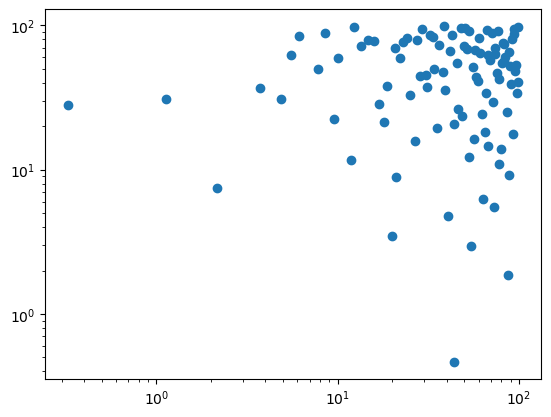

In [161]:
x = np.array(list(zip(*samples)))[0]
y = np.array(list(zip(*samples)))[1]

plt.scatter(x, y)
plt.yscale('log')
plt.xscale('log')

In [89]:
more = lhs.generate(space.dimensions, 32, existing_samples=np.array(samples))

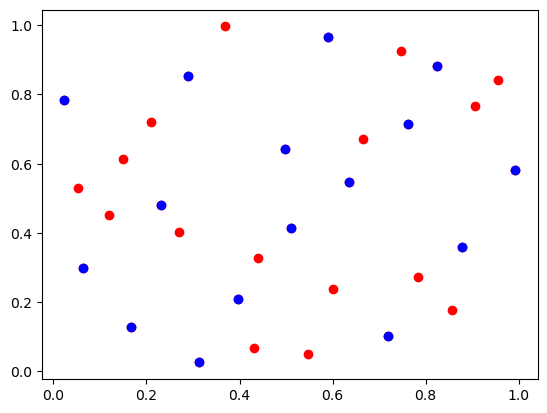

In [90]:
x2 = list(zip(*more))[0]
y2 = list(zip(*more))[1]
plt.scatter(x2, y2, color="red")
plt.scatter(x, y, color="blue")

In [91]:
even_more = lhs.generate(space.dimensions, 48, existing_samples=np.array(more))
x3 = list(zip(*even_more))[0]
y3 = list(zip(*even_more))[1]

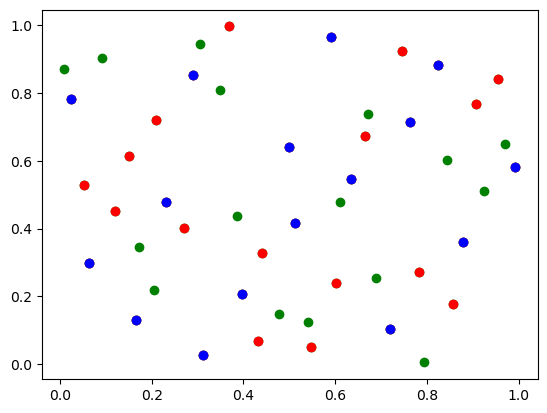

In [94]:
plt.scatter(x3, y3, color="green")
plt.scatter(x2, y2, color="red")
plt.scatter(x, y, color="blue")

In [93]:
most = lhs.generate(space.dimensions, 64, existing_samples=np.array(even_more))
x4 = list(zip(*most))[0]
y4 = list(zip(*most))[1]

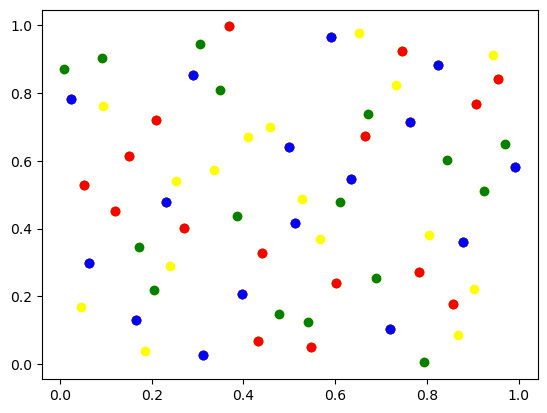

In [95]:
plt.scatter(x4, y4, color="yellow")
plt.scatter(x3, y3, color="green")
plt.scatter(x2, y2, color="red")
plt.scatter(x, y, color="blue")